In [6]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt
%matplotlib inline

N = 256
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y, indexing="ij")    # Creates the grid


c = xv + 1j*y

z = np.zeros((N, N), dtype=np.complex128)

for i in range(10):
    z = z**2 + c
    
m = np.ones((N, N))
m[np.abs(z) <= 2] = 0.0

fig, ax = plt.subplots()
ax.imshow(m)




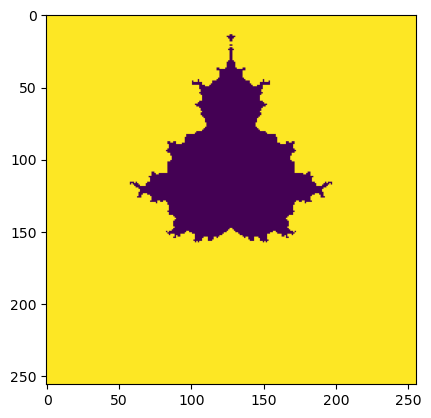

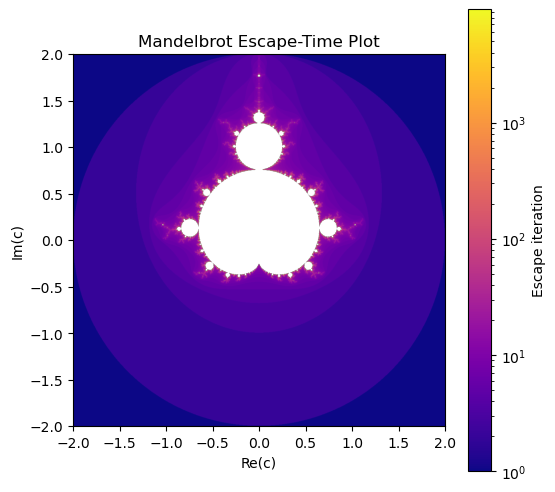

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


%matplotlib inline
N = 1024
max_iter = 10000

x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
xv, yv = np.meshgrid(x, y, indexing="ij")

c = xv + 1j * yv
z = np.zeros_like(c)  

m = np.zeros((N, N), dtype=int)   
mask = np.ones((N, N), dtype=bool)  # MASK TO DISABLE COMPUTATION IF A POINT ALREADY ESCAPED

for i in range(1, max_iter + 1):
    z[mask] = z[mask]**2 + c[mask]    # COMPUTE ONLY FOR THOSE THAT HAVEN'T ESCAPED YET
    
    escaped = (np.abs(z) >= 2) & mask   # CREATES A BOOLEAN MASK TO SET THE POINTS THAT ESCAPED AT THE CURRENT ITERATION
    m[escaped] = i                     # SETS THE INDEX OF ESCAPING AS THE VALUE IN THE FINAL PLOT
    mask[escaped] = False              # UPGRADES THE GENERAL MASK 

    if not mask.any():
        break

fig, ax = plt.subplots(figsize=(6, 6))

im = ax.imshow(
    m,
    cmap="plasma",
    norm=colors.LogNorm(vmin=1, vmax=m.max()),  # SET TO LOG SCALE 
    extent=[-2, 2, -2, 2]
)

ax.set_title("Mandelbrot Escape-Time Plot")
ax.set_xlabel("Re(c)")
ax.set_ylabel("Im(c)")

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Escape iteration")

plt.show()
